In [2]:
#https://www.kaggle.com/ketangangal/heart-disease-dataset-uci

#Tasks:
#1. Do the train_test_split with random_state=2021, test_size=0.2
#2. On X_train,y_train, try ML algorithms(with grid search): SVC, 
#Random Forest, XG Boost, catBoost and state AUC on X_test for each of the Algos
#3. Extract 95% variation PCs from X_train and repeat task no. 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/HeartDiseaseTrain-Test.csv")

In [5]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [6]:
dum_df = pd.get_dummies(df,drop_first=True)
dum_df

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,53,140,203,155,3.1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,70,145,174,125,2.6,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
3,61,148,203,161,0.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,62,138,294,106,1.9,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1021,60,125,258,141,2.8,0,1,0,0,1,...,1,1,0,1,0,0,0,0,0,1
1022,47,110,275,118,1.0,0,1,0,0,1,...,1,1,0,1,0,0,0,0,0,0
1023,50,110,254,159,0.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [7]:
X = dum_df.drop('target',axis=1)
y = dum_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2021,
                                                    stratify=y)

# SVC

In [104]:
C_range = np.linspace(0.001,2)
param_grid = dict( C=C_range)
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)
cv = GridSearchCV(SVC(probability=True,kernel='linear'), 
                     param_grid=param_grid, cv=kfold, 
                     scoring="roc_auc")
cv.fit( X , y )
print(cv.best_params_)
print(cv.best_score_)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

{'C': 0.7353265306122448}
0.9334790601432111


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [8]:
svc=SVC(probability=True,C= 0.7353265306122448)

In [9]:
svc.fit(X_train, y_train) 
y_probs = svc.predict_proba(X_test) 
y_pred = svc.predict(X_test) 
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  0.6818181818181818
ROC_AUC of  0.679746835443038


#  XGBClassifier

In [10]:
lr_range = [0.001,0.01,0.2,0.5,0.6,1]
n_est_range = [30,70,100,120,150]
depth_range = [3,4,5,6,7,8,9]


parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=depth_range)


from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

from sklearn.model_selection import GridSearchCV
clf = XGBClassifier(random_state=2000,eval_metric='mlogloss')
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit(X,y)
df_cv = pd.DataFrame(cv.cv_results_)
print(cv.best_params_)

print(cv.best_score_)

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 120}
1.0


In [10]:
xgb=XGBClassifier(eval_metric='mlogloss',learning_rate= 0.2, max_depth= 3, n_estimators= 120)

In [11]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  1.0
ROC_AUC of  1.0


# CatBoostClassifier

In [12]:
from catboost import CatBoostClassifier
clf_grid = CatBoostClassifier(random_state=2000,iterations=250)

In [32]:
grid = {
    'learning_rate': [0.03, 0.1],
    'depth':[4, 6, 10],
    'l2_leaf_reg': [1, 3, 5]
}
grid_search_results = clf_grid.grid_search(grid, X,y,  verbose=0, plot=True,stratified=False)
grid_search_results['params']

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6641830	test: 0.6672611	best: 0.6672611 (0)	total: 3.02ms	remaining: 751ms
1:	learn: 0.6441343	test: 0.6483221	best: 0.6483221 (1)	total: 5.13ms	remaining: 636ms
2:	learn: 0.6262141	test: 0.6328315	best: 0.6328315 (2)	total: 6.75ms	remaining: 555ms
3:	learn: 0.6077505	test: 0.6179514	best: 0.6179514 (3)	total: 8.76ms	remaining: 538ms
4:	learn: 0.5850652	test: 0.5988853	best: 0.5988853 (4)	total: 10.6ms	remaining: 520ms
5:	learn: 0.5657894	test: 0.5827981	best: 0.5827981 (5)	total: 12.7ms	remaining: 516ms
6:	learn: 0.5500670	test: 0.5695218	best: 0.5695218 (6)	total: 14.6ms	remaining: 508ms
7:	learn: 0.5351744	test: 0.5583809	best: 0.5583809 (7)	total: 16.7ms	remaining: 505ms
8:	learn: 0.5206635	test: 0.5461642	best: 0.5461642 (8)	total: 18.8ms	remaining: 502ms
9:	learn: 0.5103526	test: 0.5361990	best: 0.5361990 (9)	total: 20.9ms	remaining: 502ms
10:	learn: 0.4923823	test: 0.5222679	best: 0.5222679 (10)	total: 22.8ms	remaining: 496ms
11:	learn: 0.4862849	test: 0.5169653	best

178:	learn: 0.1365418	test: 0.2376744	best: 0.2376744 (178)	total: 344ms	remaining: 136ms
179:	learn: 0.1361584	test: 0.2373281	best: 0.2373281 (179)	total: 346ms	remaining: 135ms
180:	learn: 0.1357127	test: 0.2369707	best: 0.2369707 (180)	total: 348ms	remaining: 133ms
181:	learn: 0.1343640	test: 0.2360950	best: 0.2360950 (181)	total: 350ms	remaining: 131ms
182:	learn: 0.1334364	test: 0.2345260	best: 0.2345260 (182)	total: 352ms	remaining: 129ms
183:	learn: 0.1332125	test: 0.2346768	best: 0.2345260 (182)	total: 354ms	remaining: 127ms
184:	learn: 0.1325638	test: 0.2343335	best: 0.2343335 (184)	total: 356ms	remaining: 125ms
185:	learn: 0.1321713	test: 0.2343543	best: 0.2343335 (184)	total: 358ms	remaining: 123ms
186:	learn: 0.1317831	test: 0.2339032	best: 0.2339032 (186)	total: 361ms	remaining: 121ms
187:	learn: 0.1305479	test: 0.2324816	best: 0.2324816 (187)	total: 363ms	remaining: 120ms
188:	learn: 0.1303360	test: 0.2323800	best: 0.2323800 (188)	total: 365ms	remaining: 118ms
189:	learn

28:	learn: 0.2105945	test: 0.2870078	best: 0.2870078 (28)	total: 47.1ms	remaining: 359ms
29:	learn: 0.2081587	test: 0.2871774	best: 0.2870078 (28)	total: 49.4ms	remaining: 362ms
30:	learn: 0.2036138	test: 0.2808865	best: 0.2808865 (30)	total: 51.5ms	remaining: 364ms
31:	learn: 0.2006246	test: 0.2797501	best: 0.2797501 (31)	total: 53.5ms	remaining: 364ms
32:	learn: 0.1975415	test: 0.2797690	best: 0.2797501 (31)	total: 55.4ms	remaining: 364ms
33:	learn: 0.1923626	test: 0.2769123	best: 0.2769123 (33)	total: 57.4ms	remaining: 365ms
34:	learn: 0.1870299	test: 0.2739523	best: 0.2739523 (34)	total: 59.4ms	remaining: 365ms
35:	learn: 0.1826605	test: 0.2696818	best: 0.2696818 (35)	total: 61.5ms	remaining: 365ms
36:	learn: 0.1780457	test: 0.2656476	best: 0.2656476 (36)	total: 63.4ms	remaining: 365ms
37:	learn: 0.1739641	test: 0.2654258	best: 0.2654258 (37)	total: 65ms	remaining: 362ms
38:	learn: 0.1728001	test: 0.2640242	best: 0.2640242 (38)	total: 67ms	remaining: 362ms
39:	learn: 0.1716977	test

131:	learn: 0.0434923	test: 0.0937379	best: 0.0937379 (131)	total: 224ms	remaining: 200ms
132:	learn: 0.0430500	test: 0.0928227	best: 0.0928227 (132)	total: 226ms	remaining: 199ms
133:	learn: 0.0423361	test: 0.0917835	best: 0.0917835 (133)	total: 228ms	remaining: 197ms
134:	learn: 0.0419310	test: 0.0910963	best: 0.0910963 (134)	total: 230ms	remaining: 196ms
135:	learn: 0.0414108	test: 0.0891233	best: 0.0891233 (135)	total: 232ms	remaining: 195ms
136:	learn: 0.0408900	test: 0.0888313	best: 0.0888313 (136)	total: 234ms	remaining: 193ms
137:	learn: 0.0403000	test: 0.0882747	best: 0.0882747 (137)	total: 236ms	remaining: 191ms
138:	learn: 0.0397618	test: 0.0870344	best: 0.0870344 (138)	total: 237ms	remaining: 190ms
139:	learn: 0.0391870	test: 0.0860861	best: 0.0860861 (139)	total: 239ms	remaining: 188ms
140:	learn: 0.0387081	test: 0.0854378	best: 0.0854378 (140)	total: 241ms	remaining: 187ms
141:	learn: 0.0382345	test: 0.0841152	best: 0.0841152 (141)	total: 243ms	remaining: 185ms
142:	learn

44:	learn: 0.3151482	test: 0.3817700	best: 0.3817700 (44)	total: 104ms	remaining: 475ms
45:	learn: 0.3123934	test: 0.3806009	best: 0.3806009 (45)	total: 111ms	remaining: 494ms
46:	learn: 0.3100416	test: 0.3793009	best: 0.3793009 (46)	total: 114ms	remaining: 491ms
47:	learn: 0.3078300	test: 0.3780297	best: 0.3780297 (47)	total: 116ms	remaining: 489ms
48:	learn: 0.3057340	test: 0.3764464	best: 0.3764464 (48)	total: 119ms	remaining: 489ms
49:	learn: 0.3029219	test: 0.3744807	best: 0.3744807 (49)	total: 123ms	remaining: 490ms
50:	learn: 0.3005319	test: 0.3733402	best: 0.3733402 (50)	total: 125ms	remaining: 487ms
51:	learn: 0.2981744	test: 0.3716894	best: 0.3716894 (51)	total: 127ms	remaining: 483ms
52:	learn: 0.2954478	test: 0.3685888	best: 0.3685888 (52)	total: 129ms	remaining: 479ms
53:	learn: 0.2924674	test: 0.3660588	best: 0.3660588 (53)	total: 131ms	remaining: 475ms
54:	learn: 0.2897656	test: 0.3645301	best: 0.3645301 (54)	total: 134ms	remaining: 477ms
55:	learn: 0.2874350	test: 0.364

180:	learn: 0.1565639	test: 0.2651130	best: 0.2651130 (180)	total: 453ms	remaining: 173ms
181:	learn: 0.1553053	test: 0.2642119	best: 0.2642119 (181)	total: 458ms	remaining: 171ms
182:	learn: 0.1547752	test: 0.2640367	best: 0.2640367 (182)	total: 460ms	remaining: 168ms
183:	learn: 0.1545884	test: 0.2639556	best: 0.2639556 (183)	total: 462ms	remaining: 166ms
184:	learn: 0.1542329	test: 0.2634308	best: 0.2634308 (184)	total: 464ms	remaining: 163ms
185:	learn: 0.1537915	test: 0.2634037	best: 0.2634037 (185)	total: 466ms	remaining: 160ms
186:	learn: 0.1532555	test: 0.2628529	best: 0.2628529 (186)	total: 469ms	remaining: 158ms
187:	learn: 0.1521271	test: 0.2615048	best: 0.2615048 (187)	total: 471ms	remaining: 155ms
188:	learn: 0.1516292	test: 0.2612227	best: 0.2612227 (188)	total: 473ms	remaining: 153ms
189:	learn: 0.1504722	test: 0.2594315	best: 0.2594315 (189)	total: 475ms	remaining: 150ms
190:	learn: 0.1497310	test: 0.2584332	best: 0.2584332 (190)	total: 477ms	remaining: 147ms
191:	learn

50:	learn: 0.1597649	test: 0.2676157	best: 0.2676157 (50)	total: 165ms	remaining: 644ms
51:	learn: 0.1574425	test: 0.2654031	best: 0.2654031 (51)	total: 167ms	remaining: 637ms
52:	learn: 0.1545628	test: 0.2600626	best: 0.2600626 (52)	total: 170ms	remaining: 630ms
53:	learn: 0.1515795	test: 0.2558939	best: 0.2558939 (53)	total: 172ms	remaining: 624ms
54:	learn: 0.1509849	test: 0.2553964	best: 0.2553964 (54)	total: 175ms	remaining: 621ms
55:	learn: 0.1490518	test: 0.2540275	best: 0.2540275 (55)	total: 178ms	remaining: 618ms
56:	learn: 0.1462572	test: 0.2490600	best: 0.2490600 (56)	total: 181ms	remaining: 612ms
57:	learn: 0.1434480	test: 0.2483361	best: 0.2483361 (57)	total: 184ms	remaining: 608ms
58:	learn: 0.1409614	test: 0.2462769	best: 0.2462769 (58)	total: 190ms	remaining: 615ms
59:	learn: 0.1392724	test: 0.2454728	best: 0.2454728 (59)	total: 193ms	remaining: 611ms
60:	learn: 0.1384689	test: 0.2452245	best: 0.2452245 (60)	total: 196ms	remaining: 607ms
61:	learn: 0.1367271	test: 0.243

184:	learn: 0.0333967	test: 0.0949800	best: 0.0943565 (182)	total: 510ms	remaining: 179ms
185:	learn: 0.0330678	test: 0.0942872	best: 0.0942872 (185)	total: 512ms	remaining: 176ms
186:	learn: 0.0329944	test: 0.0939478	best: 0.0939478 (186)	total: 515ms	remaining: 173ms
187:	learn: 0.0328217	test: 0.0930904	best: 0.0930904 (187)	total: 519ms	remaining: 171ms
188:	learn: 0.0327847	test: 0.0930673	best: 0.0930673 (188)	total: 521ms	remaining: 168ms
189:	learn: 0.0321389	test: 0.0915289	best: 0.0915289 (189)	total: 524ms	remaining: 165ms
190:	learn: 0.0316869	test: 0.0907934	best: 0.0907934 (190)	total: 526ms	remaining: 162ms
191:	learn: 0.0314663	test: 0.0906495	best: 0.0906495 (191)	total: 529ms	remaining: 160ms
192:	learn: 0.0309161	test: 0.0896097	best: 0.0896097 (192)	total: 531ms	remaining: 157ms
193:	learn: 0.0305819	test: 0.0889661	best: 0.0889661 (193)	total: 534ms	remaining: 154ms
194:	learn: 0.0303633	test: 0.0884728	best: 0.0884728 (194)	total: 536ms	remaining: 151ms
195:	learn

110:	learn: 0.2163057	test: 0.3122527	best: 0.3122527 (110)	total: 197ms	remaining: 247ms
111:	learn: 0.2155414	test: 0.3121896	best: 0.3121896 (111)	total: 200ms	remaining: 247ms
112:	learn: 0.2149653	test: 0.3123390	best: 0.3121896 (111)	total: 202ms	remaining: 245ms
113:	learn: 0.2146302	test: 0.3122628	best: 0.3121896 (111)	total: 204ms	remaining: 243ms
114:	learn: 0.2140550	test: 0.3119987	best: 0.3119987 (114)	total: 206ms	remaining: 242ms
115:	learn: 0.2124838	test: 0.3108862	best: 0.3108862 (115)	total: 208ms	remaining: 240ms
116:	learn: 0.2117781	test: 0.3102273	best: 0.3102273 (116)	total: 209ms	remaining: 238ms
117:	learn: 0.2112798	test: 0.3101605	best: 0.3101605 (117)	total: 211ms	remaining: 236ms
118:	learn: 0.2106135	test: 0.3096804	best: 0.3096804 (118)	total: 212ms	remaining: 234ms
119:	learn: 0.2099401	test: 0.3096991	best: 0.3096804 (118)	total: 214ms	remaining: 232ms
120:	learn: 0.2091966	test: 0.3084246	best: 0.3084246 (120)	total: 216ms	remaining: 230ms
121:	learn

209:	learn: 0.1509241	test: 0.2630395	best: 0.2630395 (209)	total: 373ms	remaining: 71ms
210:	learn: 0.1501712	test: 0.2618384	best: 0.2618384 (210)	total: 375ms	remaining: 69.4ms
211:	learn: 0.1495109	test: 0.2612780	best: 0.2612780 (211)	total: 377ms	remaining: 67.6ms
212:	learn: 0.1493745	test: 0.2612436	best: 0.2612436 (212)	total: 379ms	remaining: 65.9ms
213:	learn: 0.1488213	test: 0.2606891	best: 0.2606891 (213)	total: 381ms	remaining: 64.1ms
214:	learn: 0.1477771	test: 0.2599818	best: 0.2599818 (214)	total: 383ms	remaining: 62.4ms
215:	learn: 0.1471826	test: 0.2594752	best: 0.2594752 (215)	total: 385ms	remaining: 60.6ms
216:	learn: 0.1464770	test: 0.2590626	best: 0.2590626 (216)	total: 387ms	remaining: 58.9ms
217:	learn: 0.1461492	test: 0.2585259	best: 0.2585259 (217)	total: 389ms	remaining: 57.1ms
218:	learn: 0.1458848	test: 0.2580774	best: 0.2580774 (218)	total: 391ms	remaining: 55.3ms
219:	learn: 0.1451913	test: 0.2574140	best: 0.2574140 (219)	total: 392ms	remaining: 53.5ms
2

59:	learn: 0.1527004	test: 0.2530724	best: 0.2530724 (59)	total: 101ms	remaining: 320ms
60:	learn: 0.1505237	test: 0.2502504	best: 0.2502504 (60)	total: 103ms	remaining: 319ms
61:	learn: 0.1467041	test: 0.2487654	best: 0.2487654 (61)	total: 105ms	remaining: 319ms
62:	learn: 0.1456394	test: 0.2464729	best: 0.2464729 (62)	total: 107ms	remaining: 318ms
63:	learn: 0.1420512	test: 0.2422369	best: 0.2422369 (63)	total: 109ms	remaining: 317ms
64:	learn: 0.1396214	test: 0.2373682	best: 0.2373682 (64)	total: 111ms	remaining: 316ms
65:	learn: 0.1379461	test: 0.2366252	best: 0.2366252 (65)	total: 113ms	remaining: 315ms
66:	learn: 0.1363278	test: 0.2350142	best: 0.2350142 (66)	total: 115ms	remaining: 314ms
67:	learn: 0.1351035	test: 0.2340142	best: 0.2340142 (67)	total: 117ms	remaining: 313ms
68:	learn: 0.1336687	test: 0.2328116	best: 0.2328116 (68)	total: 119ms	remaining: 312ms
69:	learn: 0.1321260	test: 0.2314345	best: 0.2314345 (69)	total: 120ms	remaining: 309ms
70:	learn: 0.1295281	test: 0.230

161:	learn: 0.0517337	test: 0.1121085	best: 0.1121085 (161)	total: 275ms	remaining: 149ms
162:	learn: 0.0509754	test: 0.1113941	best: 0.1113941 (162)	total: 278ms	remaining: 148ms
163:	learn: 0.0503602	test: 0.1109441	best: 0.1109441 (163)	total: 282ms	remaining: 148ms
164:	learn: 0.0498333	test: 0.1103956	best: 0.1103956 (164)	total: 283ms	remaining: 146ms
165:	learn: 0.0492614	test: 0.1101627	best: 0.1101627 (165)	total: 285ms	remaining: 144ms
166:	learn: 0.0485254	test: 0.1090925	best: 0.1090925 (166)	total: 287ms	remaining: 143ms
167:	learn: 0.0478045	test: 0.1082074	best: 0.1082074 (167)	total: 289ms	remaining: 141ms
168:	learn: 0.0471242	test: 0.1071933	best: 0.1071933 (168)	total: 292ms	remaining: 140ms
169:	learn: 0.0467011	test: 0.1061453	best: 0.1061453 (169)	total: 294ms	remaining: 138ms
170:	learn: 0.0461634	test: 0.1048424	best: 0.1048424 (170)	total: 296ms	remaining: 137ms
171:	learn: 0.0457520	test: 0.1036978	best: 0.1036978 (171)	total: 298ms	remaining: 135ms
172:	learn

37:	learn: 0.2167851	test: 0.2872777	best: 0.2872777 (37)	total: 186ms	remaining: 1.04s
38:	learn: 0.2126287	test: 0.2837451	best: 0.2837451 (38)	total: 191ms	remaining: 1.03s
39:	learn: 0.2078722	test: 0.2786957	best: 0.2786957 (39)	total: 198ms	remaining: 1.04s
40:	learn: 0.2029609	test: 0.2760878	best: 0.2760878 (40)	total: 202ms	remaining: 1.03s
41:	learn: 0.2000593	test: 0.2736309	best: 0.2736309 (41)	total: 205ms	remaining: 1.02s
42:	learn: 0.1969764	test: 0.2723775	best: 0.2723775 (42)	total: 209ms	remaining: 1s
43:	learn: 0.1931336	test: 0.2693861	best: 0.2693861 (43)	total: 212ms	remaining: 992ms
44:	learn: 0.1901875	test: 0.2657624	best: 0.2657624 (44)	total: 215ms	remaining: 980ms
45:	learn: 0.1886172	test: 0.2645117	best: 0.2645117 (45)	total: 218ms	remaining: 969ms
46:	learn: 0.1861186	test: 0.2620199	best: 0.2620199 (46)	total: 222ms	remaining: 958ms
47:	learn: 0.1830579	test: 0.2607107	best: 0.2607107 (47)	total: 225ms	remaining: 948ms
48:	learn: 0.1792458	test: 0.254521

176:	learn: 0.0446626	test: 0.1003629	best: 0.1003629 (176)	total: 722ms	remaining: 298ms
177:	learn: 0.0442672	test: 0.0998266	best: 0.0998266 (177)	total: 726ms	remaining: 294ms
178:	learn: 0.0439713	test: 0.0989463	best: 0.0989463 (178)	total: 729ms	remaining: 289ms
179:	learn: 0.0438781	test: 0.0987765	best: 0.0987765 (179)	total: 732ms	remaining: 285ms
180:	learn: 0.0434121	test: 0.0984752	best: 0.0984752 (180)	total: 736ms	remaining: 281ms
181:	learn: 0.0430643	test: 0.0980757	best: 0.0980757 (181)	total: 741ms	remaining: 277ms
182:	learn: 0.0426181	test: 0.0976359	best: 0.0976359 (182)	total: 744ms	remaining: 273ms
183:	learn: 0.0423096	test: 0.0974143	best: 0.0974143 (183)	total: 748ms	remaining: 268ms
184:	learn: 0.0419452	test: 0.0959961	best: 0.0959961 (184)	total: 751ms	remaining: 264ms
185:	learn: 0.0414864	test: 0.0955175	best: 0.0955175 (185)	total: 755ms	remaining: 260ms
186:	learn: 0.0410860	test: 0.0951389	best: 0.0951389 (186)	total: 758ms	remaining: 255ms
187:	learn

31:	learn: 0.0799578	test: 0.1674278	best: 0.1674278 (31)	total: 98.5ms	remaining: 671ms
32:	learn: 0.0781261	test: 0.1659070	best: 0.1659070 (32)	total: 102ms	remaining: 670ms
33:	learn: 0.0774115	test: 0.1653646	best: 0.1653646 (33)	total: 106ms	remaining: 674ms
34:	learn: 0.0738248	test: 0.1590720	best: 0.1590720 (34)	total: 109ms	remaining: 672ms
35:	learn: 0.0717010	test: 0.1559561	best: 0.1559561 (35)	total: 113ms	remaining: 669ms
36:	learn: 0.0673415	test: 0.1503519	best: 0.1503519 (36)	total: 116ms	remaining: 665ms
37:	learn: 0.0645272	test: 0.1477599	best: 0.1477599 (37)	total: 118ms	remaining: 659ms
38:	learn: 0.0631219	test: 0.1449499	best: 0.1449499 (38)	total: 122ms	remaining: 663ms
39:	learn: 0.0606185	test: 0.1420903	best: 0.1420903 (39)	total: 126ms	remaining: 660ms
40:	learn: 0.0592389	test: 0.1390293	best: 0.1390293 (40)	total: 129ms	remaining: 655ms
41:	learn: 0.0576974	test: 0.1379546	best: 0.1379546 (41)	total: 132ms	remaining: 651ms
42:	learn: 0.0549312	test: 0.13

142:	learn: 0.0057255	test: 0.0898927	best: 0.0820554 (89)	total: 456ms	remaining: 342ms
143:	learn: 0.0056580	test: 0.0899851	best: 0.0820554 (89)	total: 460ms	remaining: 339ms
144:	learn: 0.0055500	test: 0.0895766	best: 0.0820554 (89)	total: 464ms	remaining: 336ms
145:	learn: 0.0054828	test: 0.0911871	best: 0.0820554 (89)	total: 468ms	remaining: 333ms
146:	learn: 0.0054272	test: 0.0908059	best: 0.0820554 (89)	total: 472ms	remaining: 331ms
147:	learn: 0.0053319	test: 0.0910523	best: 0.0820554 (89)	total: 475ms	remaining: 328ms
148:	learn: 0.0052473	test: 0.0916485	best: 0.0820554 (89)	total: 479ms	remaining: 324ms
149:	learn: 0.0051766	test: 0.0929379	best: 0.0820554 (89)	total: 482ms	remaining: 321ms
150:	learn: 0.0050667	test: 0.0927094	best: 0.0820554 (89)	total: 485ms	remaining: 318ms
151:	learn: 0.0049958	test: 0.0926111	best: 0.0820554 (89)	total: 489ms	remaining: 315ms
152:	learn: 0.0049144	test: 0.0929905	best: 0.0820554 (89)	total: 492ms	remaining: 312ms
153:	learn: 0.0047969

5:	learn: 0.5266701	test: 0.5441536	best: 0.5441536 (5)	total: 18ms	remaining: 731ms
6:	learn: 0.5026335	test: 0.5228871	best: 0.5228871 (6)	total: 21.4ms	remaining: 742ms
7:	learn: 0.4816409	test: 0.5059780	best: 0.5059780 (7)	total: 24.7ms	remaining: 748ms
8:	learn: 0.4636526	test: 0.4885609	best: 0.4885609 (8)	total: 28.1ms	remaining: 752ms
9:	learn: 0.4494369	test: 0.4764561	best: 0.4764561 (9)	total: 31.4ms	remaining: 754ms
10:	learn: 0.4355237	test: 0.4665836	best: 0.4665836 (10)	total: 34.4ms	remaining: 748ms
11:	learn: 0.4181158	test: 0.4493992	best: 0.4493992 (11)	total: 37.2ms	remaining: 738ms
12:	learn: 0.4055716	test: 0.4390604	best: 0.4390604 (12)	total: 40.3ms	remaining: 735ms
13:	learn: 0.3942335	test: 0.4298314	best: 0.4298314 (13)	total: 43.5ms	remaining: 734ms
14:	learn: 0.3820845	test: 0.4209672	best: 0.4209672 (14)	total: 46.3ms	remaining: 726ms
15:	learn: 0.3713522	test: 0.4114599	best: 0.4114599 (15)	total: 49.1ms	remaining: 718ms
16:	learn: 0.3620548	test: 0.4050

103:	learn: 0.1193691	test: 0.2042568	best: 0.2042568 (103)	total: 379ms	remaining: 532ms
104:	learn: 0.1184598	test: 0.2036870	best: 0.2036870 (104)	total: 386ms	remaining: 533ms
105:	learn: 0.1169385	test: 0.2021383	best: 0.2021383 (105)	total: 390ms	remaining: 529ms
106:	learn: 0.1158536	test: 0.2010966	best: 0.2010966 (106)	total: 395ms	remaining: 528ms
107:	learn: 0.1150602	test: 0.2013553	best: 0.2010966 (106)	total: 398ms	remaining: 524ms
108:	learn: 0.1137141	test: 0.1998327	best: 0.1998327 (108)	total: 404ms	remaining: 523ms
109:	learn: 0.1126052	test: 0.1988920	best: 0.1988920 (109)	total: 408ms	remaining: 519ms
110:	learn: 0.1118313	test: 0.1980265	best: 0.1980265 (110)	total: 411ms	remaining: 515ms
111:	learn: 0.1107268	test: 0.1961405	best: 0.1961405 (111)	total: 415ms	remaining: 511ms
112:	learn: 0.1094917	test: 0.1945792	best: 0.1945792 (112)	total: 418ms	remaining: 507ms
113:	learn: 0.1088812	test: 0.1944338	best: 0.1944338 (113)	total: 421ms	remaining: 503ms
114:	learn

212:	learn: 0.0550331	test: 0.1227144	best: 0.1227144 (212)	total: 736ms	remaining: 128ms
213:	learn: 0.0547145	test: 0.1224987	best: 0.1224987 (213)	total: 740ms	remaining: 124ms
214:	learn: 0.0541438	test: 0.1219215	best: 0.1219215 (214)	total: 743ms	remaining: 121ms
215:	learn: 0.0537503	test: 0.1209879	best: 0.1209879 (215)	total: 746ms	remaining: 117ms
216:	learn: 0.0535851	test: 0.1210338	best: 0.1209879 (215)	total: 750ms	remaining: 114ms
217:	learn: 0.0533950	test: 0.1208911	best: 0.1208911 (217)	total: 753ms	remaining: 110ms
218:	learn: 0.0528573	test: 0.1204633	best: 0.1204633 (218)	total: 756ms	remaining: 107ms
219:	learn: 0.0525558	test: 0.1200532	best: 0.1200532 (219)	total: 758ms	remaining: 103ms
220:	learn: 0.0521876	test: 0.1196990	best: 0.1196990 (220)	total: 762ms	remaining: 99.9ms
221:	learn: 0.0518448	test: 0.1193648	best: 0.1193648 (221)	total: 764ms	remaining: 96.4ms
222:	learn: 0.0515851	test: 0.1188598	best: 0.1188598 (222)	total: 767ms	remaining: 92.9ms
223:	le

87:	learn: 0.0322000	test: 0.0912849	best: 0.0912849 (87)	total: 248ms	remaining: 457ms
88:	learn: 0.0312944	test: 0.0906294	best: 0.0906294 (88)	total: 252ms	remaining: 455ms
89:	learn: 0.0311128	test: 0.0904097	best: 0.0904097 (89)	total: 255ms	remaining: 454ms
90:	learn: 0.0308166	test: 0.0901374	best: 0.0901374 (90)	total: 259ms	remaining: 452ms
91:	learn: 0.0304485	test: 0.0897357	best: 0.0897357 (91)	total: 262ms	remaining: 451ms
92:	learn: 0.0300846	test: 0.0891344	best: 0.0891344 (92)	total: 267ms	remaining: 451ms
93:	learn: 0.0290967	test: 0.0876380	best: 0.0876380 (93)	total: 270ms	remaining: 449ms
94:	learn: 0.0285988	test: 0.0861450	best: 0.0861450 (94)	total: 273ms	remaining: 446ms
95:	learn: 0.0279602	test: 0.0850132	best: 0.0850132 (95)	total: 277ms	remaining: 445ms
96:	learn: 0.0274666	test: 0.0850126	best: 0.0850126 (96)	total: 281ms	remaining: 444ms
97:	learn: 0.0266966	test: 0.0835798	best: 0.0835798 (97)	total: 285ms	remaining: 442ms
98:	learn: 0.0262915	test: 0.082

200:	learn: 0.0080643	test: 0.0743556	best: 0.0711141 (157)	total: 604ms	remaining: 147ms
201:	learn: 0.0080296	test: 0.0743229	best: 0.0711141 (157)	total: 608ms	remaining: 144ms
202:	learn: 0.0079657	test: 0.0753359	best: 0.0711141 (157)	total: 611ms	remaining: 142ms
203:	learn: 0.0078855	test: 0.0755744	best: 0.0711141 (157)	total: 615ms	remaining: 139ms
204:	learn: 0.0078573	test: 0.0756527	best: 0.0711141 (157)	total: 619ms	remaining: 136ms
205:	learn: 0.0077509	test: 0.0755310	best: 0.0711141 (157)	total: 622ms	remaining: 133ms
206:	learn: 0.0076587	test: 0.0753196	best: 0.0711141 (157)	total: 624ms	remaining: 130ms
207:	learn: 0.0075755	test: 0.0750366	best: 0.0711141 (157)	total: 627ms	remaining: 127ms
208:	learn: 0.0075388	test: 0.0754885	best: 0.0711141 (157)	total: 630ms	remaining: 124ms
209:	learn: 0.0074584	test: 0.0753583	best: 0.0711141 (157)	total: 633ms	remaining: 121ms
210:	learn: 0.0074040	test: 0.0750728	best: 0.0711141 (157)	total: 636ms	remaining: 118ms
211:	learn

66:	learn: 0.1844908	test: 0.2720864	best: 0.2720864 (66)	total: 214ms	remaining: 583ms
67:	learn: 0.1824211	test: 0.2696818	best: 0.2696818 (67)	total: 219ms	remaining: 586ms
68:	learn: 0.1808185	test: 0.2685258	best: 0.2685258 (68)	total: 224ms	remaining: 587ms
69:	learn: 0.1797559	test: 0.2684907	best: 0.2684907 (69)	total: 234ms	remaining: 602ms
70:	learn: 0.1772663	test: 0.2654105	best: 0.2654105 (70)	total: 239ms	remaining: 603ms
71:	learn: 0.1757058	test: 0.2641239	best: 0.2641239 (71)	total: 243ms	remaining: 600ms
72:	learn: 0.1745738	test: 0.2630703	best: 0.2630703 (72)	total: 247ms	remaining: 600ms
73:	learn: 0.1722624	test: 0.2614320	best: 0.2614320 (73)	total: 251ms	remaining: 596ms
74:	learn: 0.1708247	test: 0.2597809	best: 0.2597809 (74)	total: 254ms	remaining: 592ms
75:	learn: 0.1695218	test: 0.2588654	best: 0.2588654 (75)	total: 262ms	remaining: 600ms
76:	learn: 0.1682263	test: 0.2578441	best: 0.2578441 (76)	total: 266ms	remaining: 598ms
77:	learn: 0.1668708	test: 0.256

202:	learn: 0.0693497	test: 0.1451536	best: 0.1451536 (202)	total: 752ms	remaining: 174ms
203:	learn: 0.0688161	test: 0.1442427	best: 0.1442427 (203)	total: 756ms	remaining: 170ms
204:	learn: 0.0683997	test: 0.1436809	best: 0.1436809 (204)	total: 759ms	remaining: 167ms
205:	learn: 0.0679586	test: 0.1430759	best: 0.1430759 (205)	total: 763ms	remaining: 163ms
206:	learn: 0.0679332	test: 0.1430696	best: 0.1430696 (206)	total: 765ms	remaining: 159ms
207:	learn: 0.0675725	test: 0.1422894	best: 0.1422894 (207)	total: 768ms	remaining: 155ms
208:	learn: 0.0673088	test: 0.1415284	best: 0.1415284 (208)	total: 772ms	remaining: 151ms
209:	learn: 0.0670353	test: 0.1412965	best: 0.1412965 (209)	total: 775ms	remaining: 148ms
210:	learn: 0.0668145	test: 0.1410531	best: 0.1410531 (210)	total: 777ms	remaining: 144ms
211:	learn: 0.0663009	test: 0.1399862	best: 0.1399862 (211)	total: 780ms	remaining: 140ms
212:	learn: 0.0661083	test: 0.1395406	best: 0.1395406 (212)	total: 783ms	remaining: 136ms
213:	learn

73:	learn: 0.0505981	test: 0.1223692	best: 0.1223692 (73)	total: 221ms	remaining: 525ms
74:	learn: 0.0501603	test: 0.1218518	best: 0.1218518 (74)	total: 224ms	remaining: 523ms
75:	learn: 0.0493652	test: 0.1210631	best: 0.1210631 (75)	total: 227ms	remaining: 521ms
76:	learn: 0.0486724	test: 0.1192702	best: 0.1192702 (76)	total: 231ms	remaining: 518ms
77:	learn: 0.0473569	test: 0.1182960	best: 0.1182960 (77)	total: 234ms	remaining: 516ms
78:	learn: 0.0469056	test: 0.1175406	best: 0.1175406 (78)	total: 237ms	remaining: 514ms
79:	learn: 0.0457145	test: 0.1150033	best: 0.1150033 (79)	total: 241ms	remaining: 511ms
80:	learn: 0.0455826	test: 0.1145985	best: 0.1145985 (80)	total: 245ms	remaining: 511ms
81:	learn: 0.0450869	test: 0.1135813	best: 0.1135813 (81)	total: 249ms	remaining: 509ms
82:	learn: 0.0440748	test: 0.1113650	best: 0.1113650 (82)	total: 252ms	remaining: 506ms
83:	learn: 0.0433281	test: 0.1105619	best: 0.1105619 (83)	total: 254ms	remaining: 503ms
84:	learn: 0.0427823	test: 0.109

193:	learn: 0.0124201	test: 0.0803445	best: 0.0799146 (189)	total: 580ms	remaining: 167ms
194:	learn: 0.0122885	test: 0.0810228	best: 0.0799146 (189)	total: 583ms	remaining: 165ms
195:	learn: 0.0122235	test: 0.0807776	best: 0.0799146 (189)	total: 586ms	remaining: 162ms
196:	learn: 0.0121400	test: 0.0809222	best: 0.0799146 (189)	total: 589ms	remaining: 159ms
197:	learn: 0.0120252	test: 0.0807253	best: 0.0799146 (189)	total: 592ms	remaining: 156ms
198:	learn: 0.0118903	test: 0.0802056	best: 0.0799146 (189)	total: 595ms	remaining: 153ms
199:	learn: 0.0117399	test: 0.0796085	best: 0.0796085 (199)	total: 599ms	remaining: 150ms
200:	learn: 0.0116872	test: 0.0795622	best: 0.0795622 (200)	total: 602ms	remaining: 147ms
201:	learn: 0.0116436	test: 0.0797642	best: 0.0795622 (200)	total: 605ms	remaining: 144ms
202:	learn: 0.0116034	test: 0.0799451	best: 0.0795622 (200)	total: 607ms	remaining: 141ms
203:	learn: 0.0115253	test: 0.0796693	best: 0.0795622 (200)	total: 610ms	remaining: 138ms
204:	learn

35:	learn: 0.1018678	test: 0.1608296	best: 0.1608296 (35)	total: 656ms	remaining: 3.9s
36:	learn: 0.0984148	test: 0.1570739	best: 0.1570739 (36)	total: 676ms	remaining: 3.89s
37:	learn: 0.0944426	test: 0.1533944	best: 0.1533944 (37)	total: 695ms	remaining: 3.88s
38:	learn: 0.0911634	test: 0.1501725	best: 0.1501725 (38)	total: 714ms	remaining: 3.86s
39:	learn: 0.0879055	test: 0.1470174	best: 0.1470174 (39)	total: 731ms	remaining: 3.84s
40:	learn: 0.0850001	test: 0.1446746	best: 0.1446746 (40)	total: 750ms	remaining: 3.82s
41:	learn: 0.0822842	test: 0.1423764	best: 0.1423764 (41)	total: 769ms	remaining: 3.81s
42:	learn: 0.0797567	test: 0.1396793	best: 0.1396793 (42)	total: 786ms	remaining: 3.79s
43:	learn: 0.0772412	test: 0.1360446	best: 0.1360446 (43)	total: 808ms	remaining: 3.78s
44:	learn: 0.0747933	test: 0.1333997	best: 0.1333997 (44)	total: 829ms	remaining: 3.78s
45:	learn: 0.0721206	test: 0.1302295	best: 0.1302295 (45)	total: 847ms	remaining: 3.76s
46:	learn: 0.0700547	test: 0.1272

130:	learn: 0.0137589	test: 0.0595519	best: 0.0595519 (130)	total: 2.29s	remaining: 2.08s
131:	learn: 0.0136011	test: 0.0596202	best: 0.0595519 (130)	total: 2.31s	remaining: 2.06s
132:	learn: 0.0134207	test: 0.0592806	best: 0.0592806 (132)	total: 2.33s	remaining: 2.05s
133:	learn: 0.0132531	test: 0.0590517	best: 0.0590517 (133)	total: 2.35s	remaining: 2.03s
134:	learn: 0.0130909	test: 0.0594454	best: 0.0590517 (133)	total: 2.37s	remaining: 2.02s
135:	learn: 0.0129456	test: 0.0593239	best: 0.0590517 (133)	total: 2.39s	remaining: 2s
136:	learn: 0.0128063	test: 0.0588933	best: 0.0588933 (136)	total: 2.4s	remaining: 1.98s
137:	learn: 0.0126407	test: 0.0586552	best: 0.0586552 (137)	total: 2.42s	remaining: 1.97s
138:	learn: 0.0124611	test: 0.0586021	best: 0.0586021 (138)	total: 2.44s	remaining: 1.95s
139:	learn: 0.0123030	test: 0.0584294	best: 0.0584294 (139)	total: 2.46s	remaining: 1.94s
140:	learn: 0.0121610	test: 0.0584340	best: 0.0584294 (139)	total: 2.48s	remaining: 1.92s
141:	learn: 0.

224:	learn: 0.0058951	test: 0.0542773	best: 0.0542577 (221)	total: 3.91s	remaining: 435ms
225:	learn: 0.0058598	test: 0.0543408	best: 0.0542577 (221)	total: 3.93s	remaining: 417ms
226:	learn: 0.0058209	test: 0.0544490	best: 0.0542577 (221)	total: 3.95s	remaining: 400ms
227:	learn: 0.0057775	test: 0.0543862	best: 0.0542577 (221)	total: 3.97s	remaining: 383ms
228:	learn: 0.0057344	test: 0.0543107	best: 0.0542577 (221)	total: 3.99s	remaining: 366ms
229:	learn: 0.0056928	test: 0.0542148	best: 0.0542148 (229)	total: 4.01s	remaining: 348ms
230:	learn: 0.0056593	test: 0.0541589	best: 0.0541589 (230)	total: 4.03s	remaining: 331ms
231:	learn: 0.0056214	test: 0.0542020	best: 0.0541589 (230)	total: 4.04s	remaining: 314ms
232:	learn: 0.0055827	test: 0.0542041	best: 0.0541589 (230)	total: 4.06s	remaining: 297ms
233:	learn: 0.0055444	test: 0.0541950	best: 0.0541589 (230)	total: 4.08s	remaining: 279ms
234:	learn: 0.0055103	test: 0.0541474	best: 0.0541474 (234)	total: 4.1s	remaining: 262ms
235:	learn:

68:	learn: 0.0055306	test: 0.0451723	best: 0.0450277 (64)	total: 1.36s	remaining: 3.58s
69:	learn: 0.0054131	test: 0.0449757	best: 0.0449757 (69)	total: 1.39s	remaining: 3.58s
70:	learn: 0.0053149	test: 0.0452159	best: 0.0449757 (69)	total: 1.41s	remaining: 3.56s
71:	learn: 0.0052057	test: 0.0450815	best: 0.0449757 (69)	total: 1.44s	remaining: 3.55s
72:	learn: 0.0050987	test: 0.0451908	best: 0.0449757 (69)	total: 1.46s	remaining: 3.54s
73:	learn: 0.0049913	test: 0.0450020	best: 0.0449757 (69)	total: 1.48s	remaining: 3.51s
74:	learn: 0.0048783	test: 0.0448123	best: 0.0448123 (74)	total: 1.5s	remaining: 3.5s
75:	learn: 0.0047859	test: 0.0443632	best: 0.0443632 (75)	total: 1.52s	remaining: 3.47s
76:	learn: 0.0046988	test: 0.0446003	best: 0.0443632 (75)	total: 1.53s	remaining: 3.45s
77:	learn: 0.0046081	test: 0.0445055	best: 0.0443632 (75)	total: 1.56s	remaining: 3.43s
78:	learn: 0.0045333	test: 0.0446406	best: 0.0443632 (75)	total: 1.58s	remaining: 3.41s
79:	learn: 0.0044594	test: 0.04481

165:	learn: 0.0016771	test: 0.0440396	best: 0.0437331 (141)	total: 3.27s	remaining: 1.65s
166:	learn: 0.0016659	test: 0.0440141	best: 0.0437331 (141)	total: 3.29s	remaining: 1.63s
167:	learn: 0.0016544	test: 0.0439982	best: 0.0437331 (141)	total: 3.31s	remaining: 1.61s
168:	learn: 0.0016436	test: 0.0439736	best: 0.0437331 (141)	total: 3.33s	remaining: 1.59s
169:	learn: 0.0016317	test: 0.0440193	best: 0.0437331 (141)	total: 3.35s	remaining: 1.58s
170:	learn: 0.0016212	test: 0.0439953	best: 0.0437331 (141)	total: 3.37s	remaining: 1.56s
171:	learn: 0.0016100	test: 0.0440482	best: 0.0437331 (141)	total: 3.39s	remaining: 1.54s
172:	learn: 0.0015998	test: 0.0440248	best: 0.0437331 (141)	total: 3.41s	remaining: 1.52s
173:	learn: 0.0015897	test: 0.0440017	best: 0.0437331 (141)	total: 3.43s	remaining: 1.5s
174:	learn: 0.0015793	test: 0.0439874	best: 0.0437331 (141)	total: 3.45s	remaining: 1.48s
175:	learn: 0.0015687	test: 0.0440390	best: 0.0437331 (141)	total: 3.47s	remaining: 1.46s
176:	learn:

12:	learn: 0.3781684	test: 0.4250593	best: 0.4250593 (12)	total: 262ms	remaining: 4.78s
13:	learn: 0.3616391	test: 0.4112800	best: 0.4112800 (13)	total: 282ms	remaining: 4.76s
14:	learn: 0.3465261	test: 0.3975812	best: 0.3975812 (14)	total: 302ms	remaining: 4.73s
15:	learn: 0.3323102	test: 0.3848112	best: 0.3848112 (15)	total: 320ms	remaining: 4.67s
16:	learn: 0.3202918	test: 0.3742893	best: 0.3742893 (16)	total: 340ms	remaining: 4.66s
17:	learn: 0.3100825	test: 0.3644188	best: 0.3644188 (17)	total: 350ms	remaining: 4.51s
18:	learn: 0.2977268	test: 0.3538784	best: 0.3538784 (18)	total: 371ms	remaining: 4.51s
19:	learn: 0.2870231	test: 0.3444574	best: 0.3444574 (19)	total: 390ms	remaining: 4.49s
20:	learn: 0.2765018	test: 0.3352680	best: 0.3352680 (20)	total: 412ms	remaining: 4.49s
21:	learn: 0.2683034	test: 0.3281877	best: 0.3281877 (21)	total: 432ms	remaining: 4.47s
22:	learn: 0.2589733	test: 0.3197123	best: 0.3197123 (22)	total: 453ms	remaining: 4.47s
23:	learn: 0.2491871	test: 0.310

107:	learn: 0.0447890	test: 0.0986207	best: 0.0986207 (107)	total: 2.14s	remaining: 2.82s
108:	learn: 0.0442339	test: 0.0981789	best: 0.0981789 (108)	total: 2.16s	remaining: 2.8s
109:	learn: 0.0435630	test: 0.0969965	best: 0.0969965 (109)	total: 2.18s	remaining: 2.78s
110:	learn: 0.0430502	test: 0.0964213	best: 0.0964213 (110)	total: 2.2s	remaining: 2.76s
111:	learn: 0.0425100	test: 0.0959535	best: 0.0959535 (111)	total: 2.22s	remaining: 2.73s
112:	learn: 0.0420168	test: 0.0955252	best: 0.0955252 (112)	total: 2.24s	remaining: 2.71s
113:	learn: 0.0414487	test: 0.0947138	best: 0.0947138 (113)	total: 2.26s	remaining: 2.69s
114:	learn: 0.0409814	test: 0.0943032	best: 0.0943032 (114)	total: 2.28s	remaining: 2.67s
115:	learn: 0.0404659	test: 0.0933385	best: 0.0933385 (115)	total: 2.29s	remaining: 2.65s
116:	learn: 0.0399199	test: 0.0926164	best: 0.0926164 (116)	total: 2.31s	remaining: 2.63s
117:	learn: 0.0395164	test: 0.0923112	best: 0.0923112 (117)	total: 2.33s	remaining: 2.61s
118:	learn: 

208:	learn: 0.0180041	test: 0.0673725	best: 0.0673725 (208)	total: 4.03s	remaining: 790ms
209:	learn: 0.0178925	test: 0.0673005	best: 0.0673005 (209)	total: 4.05s	remaining: 771ms
210:	learn: 0.0177618	test: 0.0669475	best: 0.0669475 (210)	total: 4.06s	remaining: 751ms
211:	learn: 0.0176451	test: 0.0667639	best: 0.0667639 (211)	total: 4.08s	remaining: 732ms
212:	learn: 0.0175280	test: 0.0666875	best: 0.0666875 (212)	total: 4.11s	remaining: 713ms
213:	learn: 0.0173925	test: 0.0664552	best: 0.0664552 (213)	total: 4.13s	remaining: 694ms
214:	learn: 0.0172733	test: 0.0663286	best: 0.0663286 (214)	total: 4.14s	remaining: 675ms
215:	learn: 0.0171535	test: 0.0661215	best: 0.0661215 (215)	total: 4.17s	remaining: 656ms
216:	learn: 0.0170428	test: 0.0660408	best: 0.0660408 (216)	total: 4.18s	remaining: 636ms
217:	learn: 0.0169302	test: 0.0659314	best: 0.0659314 (217)	total: 4.21s	remaining: 617ms
218:	learn: 0.0168234	test: 0.0660035	best: 0.0659314 (217)	total: 4.22s	remaining: 598ms
219:	learn

52:	learn: 0.0221877	test: 0.0780951	best: 0.0778195 (50)	total: 941ms	remaining: 3.5s
53:	learn: 0.0216215	test: 0.0774254	best: 0.0774254 (53)	total: 965ms	remaining: 3.5s
54:	learn: 0.0210279	test: 0.0764553	best: 0.0764553 (54)	total: 984ms	remaining: 3.49s
55:	learn: 0.0206079	test: 0.0761484	best: 0.0761484 (55)	total: 1s	remaining: 3.48s
56:	learn: 0.0201347	test: 0.0751807	best: 0.0751807 (56)	total: 1.02s	remaining: 3.47s
57:	learn: 0.0196127	test: 0.0749435	best: 0.0749435 (57)	total: 1.04s	remaining: 3.46s
58:	learn: 0.0191473	test: 0.0752281	best: 0.0749435 (57)	total: 1.07s	remaining: 3.46s
59:	learn: 0.0186750	test: 0.0746419	best: 0.0746419 (59)	total: 1.09s	remaining: 3.45s
60:	learn: 0.0181817	test: 0.0733168	best: 0.0733168 (60)	total: 1.11s	remaining: 3.44s
61:	learn: 0.0178131	test: 0.0731735	best: 0.0731735 (61)	total: 1.13s	remaining: 3.43s
62:	learn: 0.0174259	test: 0.0727663	best: 0.0727663 (62)	total: 1.15s	remaining: 3.42s
63:	learn: 0.0170925	test: 0.0718978	

148:	learn: 0.0056041	test: 0.0596714	best: 0.0595924 (146)	total: 2.76s	remaining: 1.87s
149:	learn: 0.0055587	test: 0.0597513	best: 0.0595924 (146)	total: 2.78s	remaining: 1.85s
150:	learn: 0.0055194	test: 0.0597592	best: 0.0595924 (146)	total: 2.8s	remaining: 1.84s
151:	learn: 0.0054728	test: 0.0592289	best: 0.0592289 (151)	total: 2.82s	remaining: 1.82s
152:	learn: 0.0054333	test: 0.0593052	best: 0.0592289 (151)	total: 2.84s	remaining: 1.8s
153:	learn: 0.0053937	test: 0.0593029	best: 0.0592289 (151)	total: 2.86s	remaining: 1.78s
154:	learn: 0.0053549	test: 0.0593781	best: 0.0592289 (151)	total: 2.88s	remaining: 1.77s
155:	learn: 0.0053092	test: 0.0593137	best: 0.0592289 (151)	total: 2.9s	remaining: 1.75s
156:	learn: 0.0052700	test: 0.0592592	best: 0.0592289 (151)	total: 2.92s	remaining: 1.73s
157:	learn: 0.0052259	test: 0.0591968	best: 0.0591968 (157)	total: 2.94s	remaining: 1.71s
158:	learn: 0.0051826	test: 0.0591357	best: 0.0591357 (158)	total: 2.97s	remaining: 1.7s
159:	learn: 0.

248:	learn: 0.0031125	test: 0.0598687	best: 0.0589472 (194)	total: 4.63s	remaining: 18.6ms
249:	learn: 0.0030999	test: 0.0599221	best: 0.0589472 (194)	total: 4.65s	remaining: 0us

bestTest = 0.05894724238
bestIteration = 194

0:	learn: 0.6620429	test: 0.6657852	best: 0.6657852 (0)	total: 23.4ms	remaining: 5.83s
1:	learn: 0.6335840	test: 0.6415427	best: 0.6415427 (1)	total: 43.3ms	remaining: 5.37s
2:	learn: 0.6097339	test: 0.6223136	best: 0.6223136 (2)	total: 63.3ms	remaining: 5.21s
3:	learn: 0.5872175	test: 0.6051183	best: 0.6051183 (3)	total: 82.5ms	remaining: 5.08s
4:	learn: 0.5636821	test: 0.5855174	best: 0.5855174 (4)	total: 102ms	remaining: 5.01s
5:	learn: 0.5393324	test: 0.5654056	best: 0.5654056 (5)	total: 121ms	remaining: 4.93s
6:	learn: 0.5179962	test: 0.5487680	best: 0.5487680 (6)	total: 143ms	remaining: 4.96s
7:	learn: 0.4984944	test: 0.5324196	best: 0.5324196 (7)	total: 164ms	remaining: 4.96s
8:	learn: 0.4808371	test: 0.5170034	best: 0.5170034 (8)	total: 187ms	remaining: 5s

95:	learn: 0.0762595	test: 0.1372831	best: 0.1372831 (95)	total: 1.87s	remaining: 3s
96:	learn: 0.0753184	test: 0.1361325	best: 0.1361325 (96)	total: 1.89s	remaining: 2.98s
97:	learn: 0.0743716	test: 0.1350010	best: 0.1350010 (97)	total: 1.91s	remaining: 2.96s
98:	learn: 0.0734726	test: 0.1338198	best: 0.1338198 (98)	total: 1.93s	remaining: 2.94s
99:	learn: 0.0724678	test: 0.1325913	best: 0.1325913 (99)	total: 1.95s	remaining: 2.92s
100:	learn: 0.0715486	test: 0.1315761	best: 0.1315761 (100)	total: 1.97s	remaining: 2.9s
101:	learn: 0.0706805	test: 0.1305605	best: 0.1305605 (101)	total: 1.99s	remaining: 2.88s
102:	learn: 0.0697802	test: 0.1295963	best: 0.1295963 (102)	total: 2.01s	remaining: 2.87s
103:	learn: 0.0689653	test: 0.1288737	best: 0.1288737 (103)	total: 2.03s	remaining: 2.84s
104:	learn: 0.0682840	test: 0.1281086	best: 0.1281086 (104)	total: 2.04s	remaining: 2.82s
105:	learn: 0.0674993	test: 0.1269762	best: 0.1269762 (105)	total: 2.06s	remaining: 2.8s
106:	learn: 0.0665741	tes

195:	learn: 0.0309747	test: 0.0846969	best: 0.0846969 (195)	total: 3.74s	remaining: 1.03s
196:	learn: 0.0308026	test: 0.0849775	best: 0.0846969 (195)	total: 3.74s	remaining: 1s
197:	learn: 0.0306012	test: 0.0847738	best: 0.0846969 (195)	total: 3.76s	remaining: 988ms
198:	learn: 0.0303757	test: 0.0844451	best: 0.0844451 (198)	total: 3.78s	remaining: 969ms
199:	learn: 0.0301816	test: 0.0842398	best: 0.0842398 (199)	total: 3.8s	remaining: 950ms
200:	learn: 0.0299912	test: 0.0839459	best: 0.0839459 (200)	total: 3.83s	remaining: 933ms
201:	learn: 0.0297988	test: 0.0838524	best: 0.0838524 (201)	total: 3.85s	remaining: 914ms
202:	learn: 0.0295827	test: 0.0835184	best: 0.0835184 (202)	total: 3.87s	remaining: 896ms
203:	learn: 0.0293921	test: 0.0833052	best: 0.0833052 (203)	total: 3.89s	remaining: 877ms
204:	learn: 0.0292117	test: 0.0831707	best: 0.0831707 (204)	total: 3.91s	remaining: 858ms
205:	learn: 0.0290254	test: 0.0828804	best: 0.0828804 (205)	total: 3.93s	remaining: 839ms
206:	learn: 0.

45:	learn: 0.0413681	test: 0.0943245	best: 0.0943245 (45)	total: 941ms	remaining: 4.17s
46:	learn: 0.0403190	test: 0.0926001	best: 0.0926001 (46)	total: 964ms	remaining: 4.16s
47:	learn: 0.0394390	test: 0.0920731	best: 0.0920731 (47)	total: 982ms	remaining: 4.13s
48:	learn: 0.0384151	test: 0.0914553	best: 0.0914553 (48)	total: 1s	remaining: 4.11s
49:	learn: 0.0374792	test: 0.0903667	best: 0.0903667 (49)	total: 1.02s	remaining: 4.08s
50:	learn: 0.0365154	test: 0.0891180	best: 0.0891180 (50)	total: 1.04s	remaining: 4.05s
51:	learn: 0.0356228	test: 0.0878912	best: 0.0878912 (51)	total: 1.06s	remaining: 4.03s
52:	learn: 0.0347082	test: 0.0865057	best: 0.0865057 (52)	total: 1.08s	remaining: 4s
53:	learn: 0.0338869	test: 0.0855361	best: 0.0855361 (53)	total: 1.09s	remaining: 3.98s
54:	learn: 0.0330474	test: 0.0842632	best: 0.0842632 (54)	total: 1.12s	remaining: 3.96s
55:	learn: 0.0323800	test: 0.0831833	best: 0.0831833 (55)	total: 1.14s	remaining: 3.93s
56:	learn: 0.0321801	test: 0.0833651	b

138:	learn: 0.0104590	test: 0.0573975	best: 0.0573975 (138)	total: 2.81s	remaining: 2.24s
139:	learn: 0.0103748	test: 0.0573402	best: 0.0573402 (139)	total: 2.83s	remaining: 2.22s
140:	learn: 0.0102907	test: 0.0572219	best: 0.0572219 (140)	total: 2.85s	remaining: 2.2s
141:	learn: 0.0101927	test: 0.0572417	best: 0.0572219 (140)	total: 2.86s	remaining: 2.18s
142:	learn: 0.0101017	test: 0.0573799	best: 0.0572219 (140)	total: 2.88s	remaining: 2.16s
143:	learn: 0.0100201	test: 0.0574009	best: 0.0572219 (140)	total: 2.9s	remaining: 2.14s
144:	learn: 0.0099380	test: 0.0572826	best: 0.0572219 (140)	total: 2.92s	remaining: 2.12s
145:	learn: 0.0098616	test: 0.0572130	best: 0.0572130 (145)	total: 2.94s	remaining: 2.1s
146:	learn: 0.0097829	test: 0.0570995	best: 0.0570995 (146)	total: 2.96s	remaining: 2.07s
147:	learn: 0.0096947	test: 0.0572194	best: 0.0570995 (146)	total: 2.98s	remaining: 2.05s
148:	learn: 0.0096077	test: 0.0571889	best: 0.0570995 (146)	total: 3s	remaining: 2.03s
149:	learn: 0.00

231:	learn: 0.0057737	test: 0.0534184	best: 0.0533451 (220)	total: 4.7s	remaining: 365ms
232:	learn: 0.0057441	test: 0.0533711	best: 0.0533451 (220)	total: 4.73s	remaining: 345ms
233:	learn: 0.0057170	test: 0.0534128	best: 0.0533451 (220)	total: 4.75s	remaining: 325ms
234:	learn: 0.0056893	test: 0.0534540	best: 0.0533451 (220)	total: 4.78s	remaining: 305ms
235:	learn: 0.0056636	test: 0.0534605	best: 0.0533451 (220)	total: 4.8s	remaining: 285ms
236:	learn: 0.0056379	test: 0.0534224	best: 0.0533451 (220)	total: 4.82s	remaining: 264ms
237:	learn: 0.0056143	test: 0.0534226	best: 0.0533451 (220)	total: 4.84s	remaining: 244ms
238:	learn: 0.0055854	test: 0.0533659	best: 0.0533451 (220)	total: 4.86s	remaining: 224ms
239:	learn: 0.0055605	test: 0.0533291	best: 0.0533291 (239)	total: 4.89s	remaining: 204ms
240:	learn: 0.0055376	test: 0.0533312	best: 0.0533291 (239)	total: 4.91s	remaining: 183ms
241:	learn: 0.0055133	test: 0.0532953	best: 0.0532953 (241)	total: 4.93s	remaining: 163ms
242:	learn: 

110:	learn: 0.0034004	test: 0.0333729	best: 0.0333729 (110)
111:	learn: 0.0033591	test: 0.0333083	best: 0.0333083 (111)
112:	learn: 0.0033225	test: 0.0333059	best: 0.0333059 (112)
113:	learn: 0.0032871	test: 0.0332447	best: 0.0332447 (113)
114:	learn: 0.0032517	test: 0.0331887	best: 0.0331887 (114)
115:	learn: 0.0032166	test: 0.0331180	best: 0.0331180 (115)
116:	learn: 0.0031794	test: 0.0330567	best: 0.0330567 (116)
117:	learn: 0.0031409	test: 0.0329544	best: 0.0329544 (117)
118:	learn: 0.0031089	test: 0.0328987	best: 0.0328987 (118)
119:	learn: 0.0030768	test: 0.0328004	best: 0.0328004 (119)
120:	learn: 0.0030438	test: 0.0327202	best: 0.0327202 (120)
121:	learn: 0.0030106	test: 0.0326708	best: 0.0326708 (121)
122:	learn: 0.0029809	test: 0.0326491	best: 0.0326491 (122)
123:	learn: 0.0029466	test: 0.0325722	best: 0.0325722 (123)
124:	learn: 0.0029181	test: 0.0325451	best: 0.0325451 (124)
125:	learn: 0.0028868	test: 0.0324892	best: 0.0324892 (125)
126:	learn: 0.0028578	test: 0.0324568	be

247:	learn: 0.0013032	test: 0.0296996	best: 0.0296924 (246)
248:	learn: 0.0012995	test: 0.0296940	best: 0.0296924 (246)
249:	learn: 0.0012941	test: 0.0296960	best: 0.0296924 (246)	total: 20.2s	remaining: 0us


{'depth': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [13]:
cat = CatBoostClassifier(depth= 10, l2_leaf_reg= 1, learning_rate= 0.1)

In [14]:
cat.fit(X_train,y_train,verbose=False,plot=True)
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[[150   0]
 [  0 158]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       158

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

Acurracy  1.0
ROC_AUC of  1.0


# RandomForest

In [34]:
parameters = {'max_features': np.arange(1,11)}

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

model_rf = RandomForestClassifier(random_state=1211)
cv = GridSearchCV(model_rf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit( X , y )

results_df = pd.DataFrame(cv.cv_results_  )

print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

{'max_features': 1}
1.0
RandomForestClassifier(max_features=1, random_state=1211)


In [15]:
rf = RandomForestClassifier(random_state=2021,max_features= 1,oob_score=True)

In [16]:
rf.fit( X_train , y_train )
y_pred = rf.predict(X_test)
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  1.0
ROC_AUC of  1.0


# PCA

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
print(pca.explained_variance_)

[3.77234369 2.00621295 1.65546609 1.51428433 1.40410895 1.35498055
 1.25065988 1.15550021 1.08780059 1.03194311 0.94471479 0.8644328
 0.78011706 0.71848046 0.66407202 0.55193813 0.41522206 0.38815409
 0.30245343 0.10540946 0.02731041 0.02587932]


In [19]:
print(np.sum(pca.explained_variance_)) 

22.021484374999986


In [20]:
print(pca.explained_variance_ratio_)  

[0.17130288 0.09110253 0.07517505 0.06876395 0.06376087 0.06152994
 0.05679271 0.0524715  0.04939724 0.04686074 0.04289969 0.03925407
 0.03542527 0.03262634 0.03015564 0.02506362 0.01885532 0.01762615
 0.01373447 0.00478666 0.00124017 0.00117519]


In [21]:
print(pca.explained_variance_ratio_ * 100)

[17.13028797  9.11025304  7.51750457  6.87639537  6.37608674  6.15299372
  5.67927149  5.24714951  4.93972417  4.68607427  4.2899687   3.92540661
  3.54252715  3.26263411  3.01556427  2.50636208  1.88553165  1.76261545
  1.37344705  0.47866644  0.12401712  0.1175185 ]


In [22]:
df_plot = pd.DataFrame(principalComponents,
                 columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11', 'PC12','PC13','PC14','PC15','PC16', 'PC17','PC18','PC19','PC20','PC21', 'PC22'],
                 index = X.index)
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
0,0.209104,-1.865280,0.346805,0.390559,1.586236,-1.808416,-0.415775,1.434604,0.984361,-1.302362,...,-0.755643,0.508526,0.251608,-0.513034,-0.505348,-0.084139,-0.067379,-0.093304,-0.032829,0.081167
1,1.849447,0.538090,3.662338,0.643973,-2.055763,-1.598361,-1.106377,0.860705,-1.355989,0.885450,...,0.730034,-1.481041,-0.165129,-0.434598,0.136061,0.622762,0.216294,-0.225392,-0.005168,-0.040958
2,1.584681,-2.051527,2.843384,1.622421,-1.152087,-0.696958,-0.905171,-0.782224,-2.114464,0.725326,...,-1.127474,-0.686267,1.251512,0.483790,-0.118900,0.801359,0.684667,-0.173439,-0.032584,-0.066900
3,0.271263,-1.576080,-1.459572,0.050240,0.158200,-1.660895,-0.620546,0.134044,-0.517053,0.632653,...,-2.271129,0.322634,0.062170,-1.025345,-0.265524,0.259682,0.069315,-0.123299,-0.044728,0.046006
4,1.969836,-0.022926,-0.603800,2.713697,0.979079,1.286192,0.506280,-1.889588,2.106040,1.681127,...,0.452688,-1.896351,-0.712779,-0.807357,0.670805,-0.906640,-0.097503,0.080367,-0.084072,-0.090105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,-1.969575,-0.818042,0.575899,-0.407675,0.916574,-0.871734,0.427065,-0.724886,-0.210927,1.324235,...,-0.243234,-0.062993,0.395264,2.123784,0.647361,0.763853,0.084736,-0.141459,-0.022113,0.032670
1021,3.186190,-0.342301,-1.030665,-1.524882,-0.656887,-0.182763,-0.717500,0.063626,-0.797139,0.015703,...,0.339229,0.326799,-0.494140,-0.248089,0.464744,0.748526,-0.415423,-0.117099,-0.006980,-0.059684
1022,2.090821,-0.259408,-1.437119,-2.398438,-0.765237,0.314193,0.502294,0.044034,-0.895945,-0.061216,...,0.940071,-0.103607,-0.407188,0.385873,0.691294,-0.966246,0.474505,0.056036,-0.037908,0.008764
1023,-0.979780,1.257828,0.600064,-1.583011,0.653727,0.970720,0.135831,0.335086,-0.585670,-0.461070,...,-0.389141,-0.765566,0.329207,-0.731325,-0.346031,0.094474,-0.364743,0.036672,0.020545,-0.050178


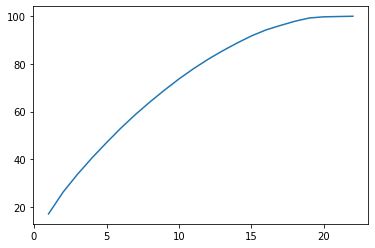

In [23]:
import matplotlib.pyplot as plt
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,23)
plt.plot(x,y)
plt.show()



In [24]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 17.13028797,  26.24054101,  33.75804558,  40.63444095,
        47.0105277 ,  53.16352142,  58.84279291,  64.08994243,
        69.0296666 ,  73.71574087,  78.00570957,  81.93111618,
        85.47364333,  88.73627744,  91.75184172,  94.25820379,
        96.14373544,  97.90635089,  99.27979794,  99.75846438,
        99.8824815 , 100.        ])

In [25]:
cols=[]
for i in range(1,23):
    colname='V'+str(i)
    cols.append(colname)

In [26]:
pca_loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22'] )
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
age,0.260027,0.154174,-0.203491,0.294885,0.178704,0.003936,0.069168,-0.138088,-0.117431,0.119926,...,-0.225070,-0.058989,0.564981,0.019829,0.181536,0.504057,0.014683,-0.043090,0.019119,-0.018525
resting_blood_pressure,0.133396,0.222023,0.152708,0.312450,0.102446,-0.042425,-0.045321,-0.012225,-0.039392,0.171090,...,-0.530294,0.183810,-0.301574,0.127731,0.025135,-0.248277,0.074029,-0.050374,-0.018920,0.008529
cholestoral,0.106777,0.234824,-0.075053,0.054211,0.354076,0.152912,-0.251942,-0.131734,-0.107423,0.141595,...,0.485700,0.476100,0.178387,-0.074664,0.036924,-0.192328,0.038420,0.019871,0.007262,-0.009338
Max_heart_rate,-0.330572,0.135543,0.087203,-0.047660,0.112826,-0.233186,-0.165517,0.193136,0.085591,-0.120452,...,-0.023810,0.257404,-0.320212,-0.170528,0.210370,0.640526,0.143670,-0.057088,0.004626,0.004693
oldpeak,0.311195,-0.073413,0.260159,0.219419,-0.115505,0.039152,-0.103390,-0.143028,-0.096686,-0.166902,...,0.208207,0.142954,-0.274298,-0.116398,0.357390,0.064331,-0.553790,-0.048045,0.000671,-0.041457
sex_Male,0.083710,-0.198545,0.058406,-0.200843,-0.381171,-0.396394,-0.078498,0.029251,0.326225,0.013739,...,0.004017,0.317705,0.376794,0.088693,0.396210,-0.166185,0.131720,-0.061378,0.000387,0.028491
chest_pain_type_Atypical angina,-0.226432,0.057054,0.039593,-0.213854,0.288673,-0.303794,0.123333,-0.339581,0.036102,0.323175,...,0.231485,-0.071368,-0.090448,0.165662,-0.086390,0.009366,-0.061300,-0.481848,-0.013798,0.001637
chest_pain_type_Non-anginal pain,-0.195868,0.143911,-0.291156,0.371944,-0.384800,0.187667,-0.154505,0.153516,0.015651,-0.241857,...,0.117868,0.098003,0.039720,0.222469,-0.154094,-0.010876,0.000813,-0.572755,-0.026830,0.010413
chest_pain_type_Typical angina,0.348241,-0.209579,0.189841,-0.199337,0.143065,0.090983,0.035837,0.100967,-0.050088,0.009671,...,-0.230381,-0.071814,0.023801,-0.256138,0.053770,-0.029743,0.019730,-0.645901,-0.016960,-0.004779
fasting_blood_sugar_Lower than 120 mg/ml,-0.066378,-0.167690,-0.027523,-0.319706,0.100174,0.229502,-0.142835,-0.335523,-0.173862,-0.321607,...,-0.357707,0.480498,0.011063,0.220275,-0.131191,0.029686,0.097842,0.012097,-0.007891,-0.005710


In [27]:
X_test_scaled=scaler.transform(X_test)
X_train_scaled=scaler.transform(X_train)

In [28]:
pca = PCA(n_components =17)#96.14373544
pca.fit(X_scaled)
X_train_scaled_transform = pca.transform(X_train_scaled)
X_test_scaled_transform=pca.transform(X_test_scaled)

In [30]:
len(X_train_scaled_transform)

717

# After PCA

# SVC

In [31]:
svc=SVC(probability=True)

In [32]:
svc.fit(X_train_scaled_transform, y_train) 
y_probs = svc.predict_proba(X_test_scaled_transform) 
y_pred = svc.predict(X_test_scaled_transform) 
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  0.9318181818181818
ROC_AUC of  0.9318565400843883


# XGBClassifier

In [33]:
xgb=XGBClassifier(eval_metric='mlogloss',learning_rate= 0.2, max_depth= 3, n_estimators= 120)

In [34]:
xgb.fit(X_train_scaled_transform,y_train)
y_pred = xgb.predict(X_test_scaled_transform)
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  1.0
ROC_AUC of  1.0


# CatBoostClassifier

In [35]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(depth= 10, l2_leaf_reg= 1, learning_rate= 0.1)

In [36]:
cat.fit(X_train_scaled_transform,y_train,verbose=False,plot=True)
y_pred = cat.predict(X_test_scaled_transform)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

[[150   0]
 [  0 158]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       158

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

Acurracy  1.0
ROC_AUC of  1.0


# RandomForest

In [37]:
rf = RandomForestClassifier(random_state=2021,max_features= 1,oob_score=True)

In [38]:
rf.fit( X_train_scaled_transform , y_train )
y_pred = rf.predict(X_test_scaled_transform)
print("Acurracy ",(accuracy_score(y_test, y_pred)))
print("ROC_AUC of ",(roc_auc_score(y_test, y_pred)))

Acurracy  1.0
ROC_AUC of  1.0
